In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import pandas as pd


train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')


In [ ]:

from sklearn.preprocessing import LabelEncoder



categorical_columns = ["seller_type","transmission","owner","fuel"]

label_encoder = LabelEncoder()



for col in categorical_columns:
    train_data[col + '_encoded'] = label_encoder.fit_transform(train_data[col])
X_train = train_data[['year', 'km_driven','seller_type_encoded','transmission_encoded','owner_encoded','fuel_encoded']]
y_train = train_data['selling_price']
categorical_columns = ["seller_type","transmission","owner","fuel"]
for col in categorical_columns:
    test_data[col + '_encoded'] = label_encoder.fit_transform(test_data[col])

X_test = test_data[['year', 'km_driven','seller_type_encoded','transmission_encoded','owner_encoded','fuel_encoded']]
y_test = test_data['selling_price']



In [ ]:

x_tilda = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
betas = np.linalg.inv(x_tilda.T @ x_tilda) @ x_tilda.T @ y_train
b0 = betas[-1]
b1 = betas[:-1]
def linear_regression(x, b0, b1):
    return b0 + x.dot(b1)



#lr_model = LinearRegression().fit(X_train, y_train)


In [ ]:





y_pred = linear_regression(X_test, b0, b1)


# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 480853.7188885443
Mean Squared Error (MSE): 231220298968.9432
Mean Absolute Error (MAE): 321862.469468251


In [ ]:


def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        error = np.dot(X, theta) - y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
    return theta





from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train)
X_tr = np.column_stack((np.ones(X_train.shape[0]), X_tr))

X_te = scaler.transform(X_test)
X_te = np.column_stack((np.ones(X_test.shape[0]), X_te))




theta = np.zeros(X_tr.shape[1])
alpha = 0.01
num_iterations = 1000


theta = gradient_descent(X_tr, y_train, theta, alpha, num_iterations)



y_pred = np.dot(X_te, theta)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 480853.2081208493
Mean Squared Error (MSE): 231219807760.1128
Mean Absolute Error (MAE): 321869.5737357536


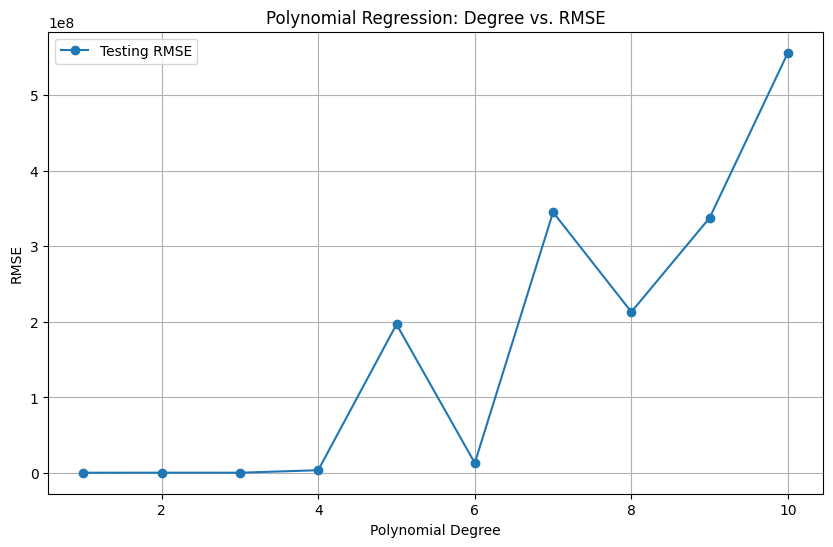

In [ ]:



rmse_test_values = []


degrees = list(range(1, 11))

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit a polynomial regression model to the training data
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)


    y_pred_test = poly_model.predict(X_poly_test)


    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    rmse_test_values.append(rmse_test)

# Create a plot to visualize the relationship between model degree and RMSE
plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_test_values, label='Testing RMSE', marker='o')
plt.title('Polynomial Regression: Degree vs. RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

